<a href="https://colab.research.google.com/github/JuanArmas/BigData7RO/blob/main/TAREA_SVM_JuanArmas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>TAREA SVM Máquinas de Vector de Soporte usando el dataset iris de scikitlearn.

Github: https://github.com/JuanArmas/BigData7RO/blob/main/TAREA_SVM_JuanArmas.ipynb

Ponemos en ejecución del modelo de scikitlearn con el módulo oneclassSVM, el cual tiene como función detectar las anomalías en un conjunto de datos predeterminado.

.

.

.

.

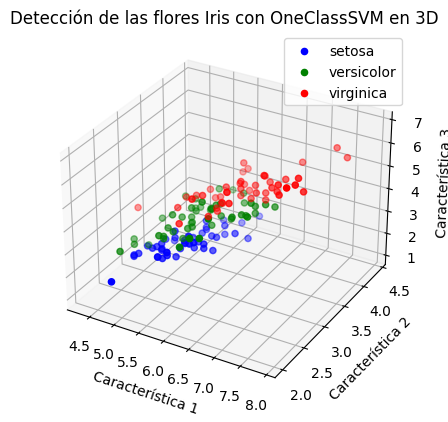

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cargamos el dataset
iris = datasets.load_iris()
X = iris.data[:, :3]  # Usamos las tres primeras características para visualización en 3D
y = iris.target

# Creamos un modelo OneClassSVM para cada clase
models = []
for i in range(3):
    # Creamos un OneClassSVM para la clase actual
    y_binary = np.where(y == i, 1, -1)  # Clase actual como positiva, resto como anomalías
    clf = OneClassSVM(kernel='rbf', gamma=0.1)
    clf.fit(X[y_binary == 1])
    models.append(clf)

# Creamos una malla para visualizar las predicciones en 3D
h = 0.2  # Tamaño de paso en la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h),
                         np.arange(z_min, z_max, h))

# Predicciones de cada modelo para cada punto en la malla
Z = np.zeros_like(xx)
for i, clf in enumerate(models):
    Z_decision = clf.decision_function(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
    Z_decision = Z_decision.reshape(xx.shape)
    Z = np.where(Z_decision > 0, i, Z)

# Configuración del gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Colores y nombres de las clases
colors = ['blue', 'green', 'red']
classes = iris.target_names

# Graficamos los resultados de la clasificación en 3D con colores y leyenda
for i, c, label in zip(range(3), colors, classes):
    ax.scatter(X[y == i, 0], X[y == i, 1], X[y == i, 2], c=c, label=label)


ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
ax.legend()

plt.title('Detección de las flores Iris con OneClassSVM en 3D')
plt.show()

El módulo OneClassSVM trata de detectar anomalías en el conjunto de datos, pero no predice la especie de una flor basándose en sus características.

Al usar OneClassSVM sobre estos datos, no hará una predicción de la especie de una flor, sino que más bien estará realizando una detección de anomalías para cada clase en el conjunto de datos. De esta manera, OneClassSvm estará tratando una clase como positiva y el resto como anomalías.

Para realizar la predicción que se busca, se necesitaría usar un modelo de clasificación, como puede ser SVM con clasificación multiclase, y entrenarlo con los datos etiquetados.

Para este caso, usaré la función SVC de scikitlearn para la clasificacion multiclase "one-vs-one", comparando cada par de clases de manera binaria, la prediccion votará a la clase ganadora y la clase que obtenga mas votos será el resultado de la prediccion final

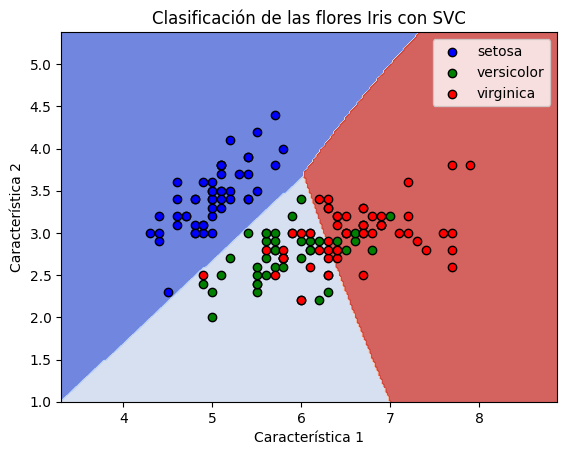

In [24]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Cargar el dataset de scikitlearn
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tomamos dos características para visualización
y = iris.target

# Creamos el modelo SVC para clasificación
clf = SVC(kernel='rbf', gamma=0.1)

# Entrenamos el modelo von los datos etiquetados
clf.fit(X, y)

# Creamos una malla para visualizar la clasificación
h = 0.02  # Tamaño de paso en la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predecimos las clases para cada punto en la malla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Convertimos los resultados a la forma de la malla
Z = Z.reshape(xx.shape)

# Graficamos los resultados de la clasificación
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Graficamos los puntos de datos
for i, color in zip([0, 1, 2], ['blue', 'green', 'red']):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], edgecolor='black')

plt.title('Clasificación de las flores Iris con SVC')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()


Una vez entrenado el modelo, le metemos datos aleatorios de la longitud y anchura del sepalo para que nos de una predicción.

Los rangos escogidos son en base a los datos del dataset Iris, para ajustarlos a los rangos conocidos y que el aleatorio no se salga de los limites.

1 = sepal_length

2 = sepal_with

3 = petal_length

4 = petal_with

In [23]:
import random

# rangos (con decimales):
# 1 -> entre 3 y 6.5 -||- 2-> entre 2 y 7 -||- 3 ->entre 1 y 2 -||- 4 -> entre 1 y 4
sepal_length = random.uniform(3.0, 6.5)
sepal_width = random.uniform(2.0, 7.0)
print("sepal_length: ",sepal_length)
print("sepal_width: ", sepal_width)
vector_prueba = [[sepal_length,sepal_width]]
prediccion_vector_prueba = clf.predict(vector_prueba)
nombre_prediccion = iris.target_names[prediccion_vector_prueba[0]]
print("La clasificación predicha para el nuevo dato es:", nombre_prediccion)

sepal_length:  4.797416208999901
sepal_width:  2.0069180380986196
La clasificación predicha para el nuevo dato es: versicolor


.

.

Implementamos ahora la libreria plotly para una visualizacion interactiva de los resultados del modelo predictivo que hemos usado.

In [ ]:
import plotly.graph_objs as go
import plotly.express as px
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np

# Cargar el dataset de Iris
iris = datasets.load_iris()

# Tomar dos características para visualización
X = iris.data[:, :2]
y = iris.target

# Crear un modelo SVC para clasificación con un kernel RBF
clf = SVC(kernel='rbf', gamma=0.1)

# Entrenar el modelo con los datos etiquetados
clf.fit(X, y)

# Crear una malla para visualizar la clasificación
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predecir las clases para cada punto en la malla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Convertir los resultados a la forma de la malla
Z = Z.reshape(xx.shape)

# Crear un gráfico interactivo con Plotly Express
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=iris.target_names[y],
                 title='Clasificación de las flores Iris con SVC')
fig.update_traces(marker=dict(size=8, line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Agregar contornos para visualizar la clasificación
fig.add_trace(go.Contour(x=np.ravel(xx), y=np.ravel(yy), z=np.ravel(Z),
                         colorscale='RdBu', opacity=0.8,
                         contours=dict(start=0, end=2, size=1)))

fig.show()

.